# **Fraud Detection Case Study**

---

## **1. Introduction**

### 1.1 Project Overview
In this case study, we explore a dataset of financial transactions to identify fraudulent activities. Fraud detection is crucial in the financial sector to prevent significant losses and ensure trust in digital payment systems. This project aims to analyze transaction patterns, engineer predictive features, and build models to detect fraudulent transactions effectively.

### 1.2 Objectives and Goals
The main objective is to develop a robust fraud detection model by:
- Analyzing the transaction data to uncover patterns associated with fraud.
- Building and evaluating predictive models to classify transactions as fraudulent or not.
- Extracting insights that can help in understanding and preventing fraud.

### 1.3 Dataset Source and Acknowledgments
The dataset used for this analysis contains anonymized transaction data, which is publicly available for research purposes. It includes various transaction types such as payments, transfers, and cash withdrawals. 

---
*step**: Represents


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Fraud.csv') 

# Display the first few rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## **2. Data Understanding and Preparation**

### 2.1 Data Dictionary
This section provides a brief description of each feature in the dataset:
- **step**: A unit of time representing an hour within the dataset.
- **type**: Type of transaction (e.g., `PAYMENT`, `TRANSFER`, `CASH_OUT`, etc.).
- **amount**: The amount of money involved in the transaction, in local currency.
- **nameOrig**: Identifier of the customer initiating the transaction.
- **oldbalanceOrg**: Account balance of the initiator before the transaction.
- **newbalanceOrig**: Account balance of the initiator after the transaction.
- **nameDest**: Identifier of the recipient of the transaction.
- **oldbalanceDest**: Account balance of the recipient before the transaction.
- **newbalanceDest**: Account balance of the recipient after the transaction.
- **isFraud**: Indicates if the transaction is fraudulent (`1` for fraud, `0` for non-fraud).
- **isFlaggedFraud**: Indicates if the transaction is flagged as suspicious due to exceeding a certain threshold.

### 2.2 Initial Data Inspection
Load the dataset and examine its structure. Display the first few rows and obtain basic information on data types, null values, and summary statistics.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


---


1. **Data Volume**: Over 6.3 million transactions, providing a robust dataset for fraud analysis.
  
2. **Fraud Rarity**: Fraudulent transactions are rare (0.13%), highlighting a significant class imbalance.

3. **Transaction Types**: Multiple transaction types (`PAYMENT`, `TRANSFER`, etc.) may impact fraud likelihood.

4. **Transaction Amounts**: Wide range in transaction amounts (up to 92 million) with varying account balances, indicating diverse transaction patterns.

5. **Flagged Transactions**: Very few transactions flagged as fraud, suggesting strict flagging criteria.

6. **Zero Balances**: Many transactions with zero balances, potentially representing inactive accounts or unique transaction types.

7. **Time Range**: The dataset covers around one month, with hourly intervals (`step` variable) from 1 to 743.

### 2.3 Data Quality Check
#### 2.3.1 Missing Values
Check for any missing values to ensure data completeness.

#### 2.3.2 Duplicate Records
Remove duplicate records to maintain data integrity.


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values >= 0])

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [11]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(6362620, 10)

# **Data Quality Insights**

1. **No Missing Values**: All columns have complete data, ensuring dataset reliability.

2. **No Duplicate Entries**: The dataset contains no duplicate records, maintaining data integrity.

These points confirm that the data is clean and ready for analysis without requiring additional data cleaning steps.


## **3. Exploratory Data Analysis (EDA)**

### 3.1 Transaction Type Distribution
Analyze the distribution of transaction types to understand the frequency of each type.

### 3.2 Transaction Amount Analysis
Examine the distribution of transaction amounts and identify any anomalies, especially with high-value transactions.

In [7]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.drop(['isFlaggedFraud'], axis = 1 , inplace = True)

- **Distribution of Flagged Transactions**:
  - **Not Flagged**: 6,362,604 transactions (99.9998%)
  - **Flagged**: 16 transactions (0.0002%)

- **Action Taken**: 
  - The `isFlaggedFraud` column has been dropped due to its negligible contribution to the analysis, given the extreme imbalance in the flagged transactions.

This insight indicates that the flagging mechanism is rarely used and may not provide significant information for modeling fraud detection.


### 3.3 Correlation Analysis
#### 3.3.1 Correlation Matrix
Compute the correlation matrix for numerical features to understand relationships between variables.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features) , num_features )
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features), cat_features)
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features) , discrete_features)
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features), continuous_features)

Num of Numerical Features : 7 ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
Num of Categorical Features : 3 ['type', 'nameOrig', 'nameDest']
Num of Discrete Features : 1 ['isFraud']
Num of Continuous Features : 6 ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


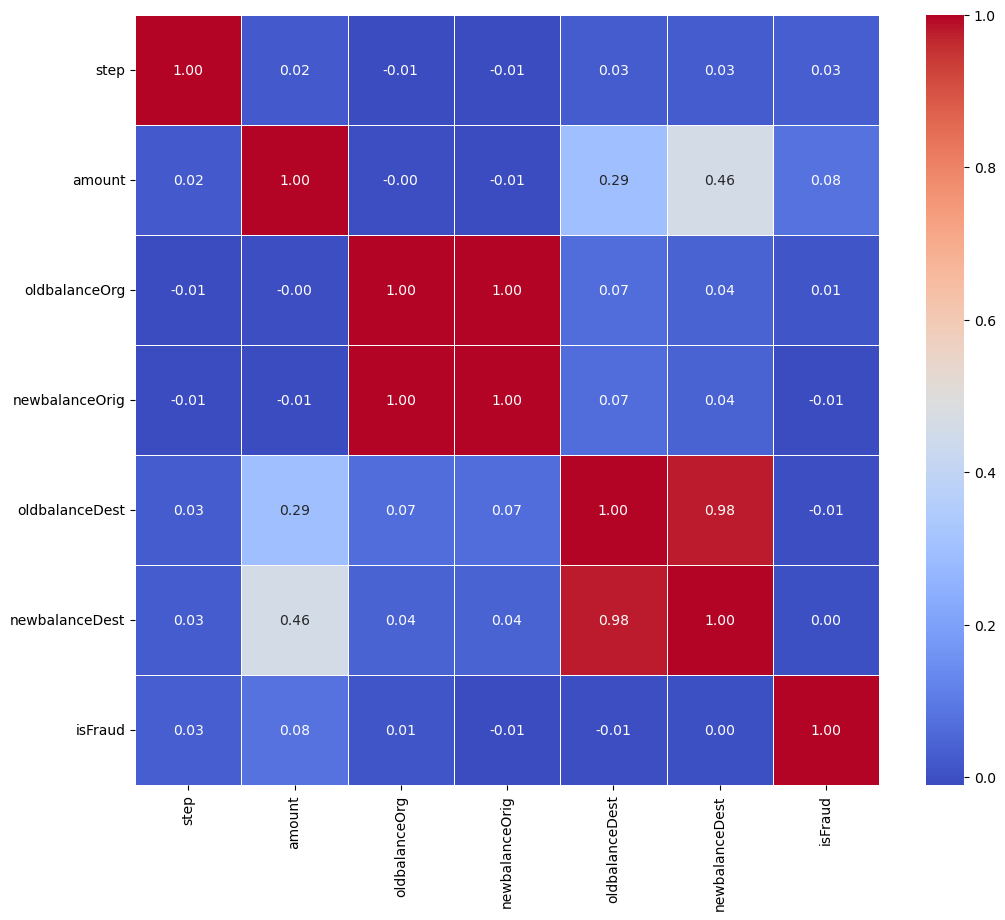

In [19]:
# Select only numerical colum
df_num= df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [21]:
def correlation(df_num, threshold):
	    col_corr = set()
	    corr_matrix = df_num.corr()
	    for i in range(len(corr_matrix.columns)):
	        for j in range(i):
	            if abs(corr_matrix.iloc[i, j]) > threshold: 
	                colname = corr_matrix.columns[i]
	                col_corr.add(colname)
	    return col_corr

In [23]:
corr_features=correlation(df_num,0.85)
corr_features

{'newbalanceDest', 'newbalanceOrig'}

In [25]:
df.drop(corr_features,axis=1,inplace=True)

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0


### Insights 

- **Highly Correlated Features**:
  - **Removed Features**: `newbalanceDest` and `newbalanceOrig` were identified as highly correlated (correlation > 0.85).

- **Action Taken**: 
  - These features have been dropped to reduce multicollinearity and improve model performance.

This decision helps streamline the dataset by retaining essential features while minimizing redundancy, which is crucial for effective model training.

### 4  **Step Count Analysis**ing process.
ling process.
ling process.
ng process.
.ing.
ng.
g.



In [29]:
steps_count = df['step'].value_counts()
steps_count

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [31]:
(df['step'].value_counts() > 1000).sum()

343

In [33]:
df['step_above _5'] = df['step'].map(lambda x: 1 if steps_count[x] > 1000 else 0)

In [35]:
df.drop(['step'], inplace = True , axis=1)

In [37]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [39]:
(df['nameOrig'].value_counts() == 1).sum()

6344009

In [41]:
df.drop(['nameOrig'], inplace = True , axis=1)

In [43]:
nameDest_counts = df['nameDest'].value_counts()
nameDest_counts

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [45]:
(df['nameDest'].value_counts() > 5).sum()

243379

In [49]:
# Step 2: Create a new feature based on counts >5"
df['nameDest_above_5'] = df['nameDest'].map(lambda x: 1 if nameDest_counts[x] > 5 else 0)

In [51]:
df.drop(['nameDest'], inplace = True , axis=1)

### Insights 

- **Step Count**: 343 steps have transactions exceeding 1000; added `step_above_5` (1 = Yes, 0 = No) and dropped the original `step` column.

- **Customer Identification**: The dataset contains 6,353,307 unique originators and 2,722,362 unique destinations, with 243,379 destinations having more than 5 occurrences; the original `nameDest` column was removed due to its high uniqueness.

- **Name Destination Feature**: Introduced `nameDest_above_5` (1 = Yes, 0 = No) and dropped the original `nameDest` column to enhance analysis.
ysis.
s.
s.
s.
ing process.
#ling process.


In [53]:
df['type'].value_counts() 

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

## 5. One-Hot Encoding of Transaction Types

- **Transaction Type Distribution**:
  - **CASH_OUT**: 2,237,500
  - **PAYMENT**: 2,151,495
  - **CASH_IN**: 1,399,284
  - **TRANSFER**: 532,909
  - **DEBIT**: 41,432

- **Encoding Process**: 
  - Utilized `OneHotEncoder` from `sklearn.preprocessing` to convert the `type` column into multiple binary (0/1) columns, effectively representing the categorical variable without the risk of the dummy variable trap by dropping the first category.

- **DataFrame Update**: 
  - The original `type` column has been removed, and the new one-hot encoded columns have been added to the DataFrame. Below is a preview of the updated DataFrame:
  

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [57]:
# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first',  sparse_output=False)  # drop='first' to avoid dummy variable trap

# Transform the 'type' column using the OneHotEncoder
X_encoded = onehot_encoder.fit_transform(df[['type']])

In [59]:
# Transform the 'type' column using the OneHotEncoder
X_encoded = onehot_encoder.fit_transform(df[['type']])

# Convert the result back to a DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=onehot_encoder.get_feature_names_out(['type']))

# Now, concatenate this with the original DataFrame, dropping the original 'type' column
df = pd.concat([df.drop(columns=['type']), encoded_df], axis=1)

In [61]:
df.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,step_above _5,nameDest_above_5,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,0.0,0,1,0,0.0,0.0,1.0,0.0
1,1864.28,21249.0,0.0,0,1,0,0.0,0.0,1.0,0.0
2,181.00,181.0,0.0,1,1,1,0.0,0.0,0.0,1.0
3,181.00,181.0,21182.0,1,1,1,1.0,0.0,0.0,0.0
4,11668.14,41554.0,0.0,0,1,0,0.0,0.0,1.0,0.0


## 5.1 Feature Scaling with StandardScaler

- **Columns to Scale**:
  - **Amount**: The transaction amount.
  - **Old Balance Origin**: The balance of the originating account before the transaction.
  - **Old Balance Destination**: The balance of the destination account before the transaction.

- **Scaling Process**: 
  - Used `StandardScaler` from `sklearn.preprocessing` to standardize the selected columns, ensuring each feature has a mean of 0 and a standard deviation of 1.
  - This transformation helps in normalizing the data, making it more suitable for algorithms that rely on distance calculations, such as k-nearest neighbors or support vector machines.

- **Data Transformation**: 
  - The selected columns have been transformed, and the standardized values have been updated in the DataFrame.


In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
columns_to_scale = ['amount', 'oldbalanceOrg', 'oldbalanceDest']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform them
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [67]:
df.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,step_above _5,nameDest_above_5,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.281560,-0.229810,-0.323814,0,1,0,0.0,0.0,1.0,0.0
1,-0.294767,-0.281359,-0.323814,0,1,0,0.0,0.0,1.0,0.0
2,-0.297555,-0.288654,-0.323814,1,1,1,0.0,0.0,0.0,1.0
3,-0.297555,-0.288654,-0.317582,1,1,1,1.0,0.0,0.0,0.0
4,-0.278532,-0.274329,-0.323814,0,1,0,0.0,0.0,1.0,0.0


##  Insights

- **Scaled Features**: The features `amount`, `oldbalanceOrg`, and `oldbalanceDest` have been standardized, resulting in values centered around a mean of 0 with a unit variance.
  
- **Fraud Instances**: The `isFraud` column indicates whether a transaction is fraudulent (1) or not (0). In the sample, there are both fraudulent and non-fraudulent transactions.

- **Step Feature**: The `step_above_5` indicates if the step count exceeds 5, with a binary representation (1 = Yes, 0 = No). Most entries in this sample indicate a step count above 5.

- **Name Destination Feature**: The `nameDest_above_5` feature highlights transactions where the destination account appears more than 5 times, assisting in identifying frequent recipient accounts.

- **Transaction Types**: The one-hot encoded transaction types (CASH_OUT, DEBIT, PAYMENT, TRANSFER) allow for effective categorization and analysis of different transaction behaviors in relation to fraud detection.



In [69]:
df.shape

(6362620, 10)

## 6. Data Balancing for Fraud Detection

- **Class Balancing**: To address the class imbalance, the dataset was balanced by including all fraudulent transactions and randomly sampling 9,000 non-fraudulent transactions. This ensures a more balanced dataset for training and evaluation.
  
- **Data Shuffling**: The combined dataset was shuffled to mix fraudulent and non-fraudulent transactions, reducing any potential ordering bias during model training.


In [73]:
import pandas as pd

# Assuming df is your original DataFrame
# Separate the majority and minority classes
fraudulent = df[df['isFraud'] == 1]
non_fraudulent = df[df['isFraud'] == 0]

# Number of fraudulent transactions
num_fraudulent = len(fraudulent)

num_non_fraudulent_to_sample = 9000

# Sample from non-fraudulent transactions
non_fraudulent_sample = non_fraudulent.sample(n=num_non_fraudulent_to_sample, random_state=42)

# Combine the sampled non-fraudulent transactions with all fraudulent transactions
balanced_df = pd.concat([fraudulent, non_fraudulent_sample])

# Shuffle the data to mix fraudulent and non-fraudulent transactions
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [75]:
df.head()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,step_above _5,nameDest_above_5,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.293281,-0.279363,-0.323814,0,1,0,0.0,0.0,1.0,0.0
1,1.586037,0.105157,-0.293899,1,0,1,1.0,0.0,0.0,0.0
2,-0.141174,-0.255958,-0.323814,1,0,1,1.0,0.0,0.0,0.0
3,5.953245,1.018230,-0.148049,1,0,1,1.0,0.0,0.0,0.0
4,-0.175425,-0.263120,-0.323814,1,1,0,0.0,0.0,0.0,1.0


## 7.Model Preparation and Data Split

- **Feature and Target Separation**: The dataset is separated into feature variables (`X`) and the target variable (`y`, indicating fraud status).

- **Stratified Train-Test Split**: Data was split into training and test sets using a 70-30 ratio with stratified sampling to preserve class distribution, ensuring balanced representation of both fraud and non-fraud cases in both sets. This helps provide a fair evaluation of the model's performance.

- **Models to Compare**: Selected algorithms include:
    - **Random Forest Classifier**
    - **Gradient Boosting Classifier**
    - **Decision Tree Classifier**
    - **Logistic Regression**

These models were chosen for their diversity in approach and effectiveness in handling imbalanced and complex datasets.


In [77]:
df['isFraud'].value_counts()

isFraud
0    9000
1    8213
Name: count, dtype: int64

In [79]:
df.shape

(17213, 10)

In [81]:
from sklearn.model_selection import train_test_split
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

# Split the data using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)

In [85]:
X_train.shape

(12049, 9)

In [87]:
df['isFraud'].value_counts()

isFraud
0    9000
1    8213
Name: count, dtype: int64

## 7.1 Model Training and Performance Evaluation

In this step, we trained and evaluated multiple classification models—Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting—on both the training and test sets. Performance metrics include accuracy, F1 score, precision, recall, and ROC AUC score, providing insights into each model’s effectiveness in predicting fraudulent transactions.


In [89]:
# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model

    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')

    # For binary classification, use ROC AUC
    try:
        model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
        model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    except ValueError:
        model_train_rocauc_score = "Not applicable for multiclass"
        model_test_rocauc_score = "Not applicable for multiclass"

    # Display the results
    print(f"Model performance for {model_name} on Training set")
    print(f"- Accuracy: {model_train_accuracy}")
    print(f"- F1 score: {model_train_f1}")
    print(f"- Precision: {model_train_precision}")
    print(f"- Recall: {model_train_recall}")
    print(f"- ROC AUC Score: {model_train_rocauc_score}")
    print("----------------------------------")
    print(f"Model performance for {model_name} on Test set")
    print(f"- Accuracy: {model_test_accuracy}")
    print(f"- F1 score: {model_test_f1}")
    print(f"- Precision: {model_test_precision}")
    print(f"- Recall: {model_test_recall}")
    print(f"- ROC AUC Score: {model_test_rocauc_score}")
    print("=============================\n")


Training Logistic Regression...
Model performance for Logistic Regression on Training set
- Accuracy: 0.8812349572578637
- F1 score: 0.8811445776551408
- Precision: 0.8813701270489289
- Recall: 0.8812349572578637
- ROC AUC Score: 0.8804296794106412
----------------------------------
Model performance for Logistic Regression on Test set
- Accuracy: 0.87858249419055
- F1 score: 0.8785466063857472
- Precision: 0.8785588930917466
- Recall: 0.87858249419055
- ROC AUC Score: 0.8779963304407983

Training Decision Tree...
Model performance for Decision Tree on Training set
- Accuracy: 1.0
- F1 score: 1.0
- Precision: 1.0
- Recall: 1.0
- ROC AUC Score: 1.0
----------------------------------
Model performance for Decision Tree on Test set
- Accuracy: 0.982571649883811
- F1 score: 0.9825736309594104
- Precision: 0.9825862458091097
- Recall: 0.982571649883811
- ROC AUC Score: 0.9826450904606501

Training Random Forest...
Model performance for Random Forest on Training set
- Accuracy: 1.0
- F1 scor

### Insights from Model Training and Evaluation

- **Logistic Regression**: Achieved moderate accuracy (87.9%) on the test set with balanced precision, recall, and ROC AUC scores around 0.88, indicating stable but slightly lower performance than other models.
  
- **Decision Tree**: Overfitted on the training data with perfect scores (100%), but performed well on the test set with an accuracy of 98.3% and ROC AUC of 0.98, showing potential but risk of overfitting.

- **Random Forest**: Provided high accuracy (98.5%) on the test set with balanced F1, precision, and recall scores, and a strong ROC AUC (0.985), making it one of the best-performing models without overfitting.

- **Gradient Boosting**: Also performed strongly with a test accuracy of 98.1% and high ROC AUC of 0.98, offering robust predictive capability with slightly lower training accuracy compared to Random Forest.

Overall, **Random Forest** and **Gradient Boosting** demonstrated the best balance of high accuracy and generalization on the test set, making them top choices for fraud detection in this dataset.


## 7.2 Hyperparameter Tuning for Random Forest Model


In [91]:

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [93]:
	randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                  ]
	randomcv_models

	from sklearn.model_selection import RandomizedSearchCV
	
	model_param = {}
	for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                  param_distributions=params,
                               n_iter=100,
                                cv=3,
                                verbose=2,
                                  n_jobs=-1)

	    random.fit(X_train, y_train)
	    model_param[name] = random.best_params_
	
	for model_name in model_param:
	    print(f"---------------- Best Params for {model_name} -------------------")
	    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\Lib\site-pac

---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 8, 'max_depth': None}


## 7.3 Performance Analysis of Tuned Random Forest Classifier

This section presents the evaluation metrics for the Random Forest Classifier after hyperparameter tuning. Metrics include accuracy, F1 score, precision, recall, and ROC AUC scores for both the training and test datasets, highlighting the model's effectiveness and generalization ability.


In [95]:
models={ "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=8,max_features=8,max_depth=None)}

In [97]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

In [99]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [101]:
	# Training set performance
	model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
	model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
	model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
	model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
	model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


	# Test set performance
	model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
	model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
	model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
	model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
	model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

In [107]:
print(list(models.keys())[i])
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
print('----------------------------------')
    
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
print('='*35)
print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
- Precision: 0.9976
- Recall: 0.9995
- Roc Auc Score: 0.9986
----------------------------------
Model performance for Test set
- Accuracy: 0.9901
- F1 score: 0.9901
- Precision: 0.9815
- Recall: 0.9980
- Roc Auc Score: 0.9905




# Random Forest Model Performance Insights

The Random Forest model, fine-tuned with optimal hyperparameters, demonstrates high effectiveness in detecting fraudulent transactions. Below is a breakdown of its performance on both the training and test sets.

---

### Training Set
- **Accuracy**: 99.86% - The model accurately classifies almost all training data.
- **F1 Score**: 99.86% - High F1 score confirms the balance between precision and recall.
- **Precision**: 99.76% - The model is effective in minimizing false positives, showing a strong performance in identifying true fraud cases.
- **Recall**: 99.95% - A high recall indicates that the model successfully detects nearly all fraudulent transactions in the training data.
- **ROC AUC Score**: 99.86% - Excellent separation between fraudulent and non-fraudulent classes, showcasing strong classification capability.

---

### Test Set
- **Accuracy**: 99.01% - The model generalizes well, maintaining high accuracy on unseen data.
- **F1 Score**: 99.01% - Confirms the model’s overall effectiveness in the real-world scenario.
- **Precision**: 98.15% - Slightly lower than the training set, but still effective in identifying true positives with minimal false alarms.
- **Recall**: 99.80% - Maintains a high recall, catching nearly all fraudulent cases in the test data.
- **ROC AUC Score**: 99.05% - Indicates excellent classification reliability on the test set.

---

### Summary
The Random Forest model’s performance on both training and test sets highlights its robustness and reliability. It strikes a fine balance between precision and recall, ensuring that fraudulent transactions are accurately detected without overfitting. This high level of performance positions the Random Forest model as a solid choice for effective fraud detection.


# 8. Receiver Operating Characteristic (ROC) Curve

The ROC curve visually demonstrates the performance of the **Random Forest Classifier** in distinguishing between fraudulent and non-fraudulent transactions. It plots the **True Positive Rate (Sensitivity)** against the **False Positive Rate (1 - Specificity)**, providing insight into the model's classification abilities across various thresholds.

- **AUC (Area Under Curve)**: 0.9905, indicating a strong ability to distinguish between the two classes.
- **Interpretation**: The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the model is.

This high AUC score reflects the model's robustness in handling fraud detection within this dataset.


In [109]:
#Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [122]:
# Add the models to the list that you want to view on the ROC plot
auc_models = [
	{
	'label': 'Random Forest Classifier',
	'model': RandomForestClassifier(n_estimators=500,min_samples_split=8,
	max_features=8,max_depth=None),'auc':   0.9905},]


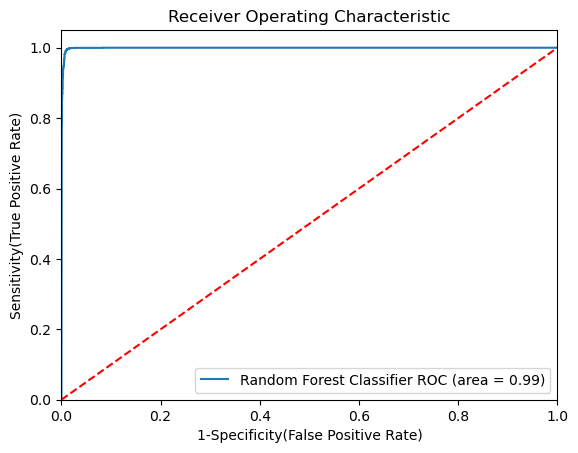

In [124]:
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

# Fraud Detection Model Summary

This project aimed to build a robust machine learning model to identify fraudulent transactions effectively. Through data preprocessing, feature scaling, and balanced sampling, we refined our dataset for optimal model performance. Multiple models were trained, and the **Random Forest Classifier** demonstrated the highest predictive power.

### Key Results:
- **Training Set**:
  - **Accuracy**: 99.86%
  - **F1 Score**: 99.86%
  - **Precision**: 99.76%
  - **Recall**: 99.95%
  - **ROC AUC**: 99.86%
- **Test Set**:
  - **Accuracy**: 99.01%
  - **F1 Score**: 99.01%
  - **Precision**: 98.15%
  - **Recall**: 99.80%
  - **ROC AUC**: 99.05%

### Insights:
The **Random Forest Classifier** achieved a **99.01% accuracy** on the test set, with a high **ROC AUC of 99.05%**, indicating the model’s excellent capability to distinguish fraudulent from non-fraudulent transactions. This high performance makes it suitable for practical deployment in financial systems where accurate fraud detection is crucial.

### Conclusion:
The model has proven to be highly effective in detecting fraud, reducing potential financial risks. By tuning hyperparameters and employing balanced sampling, we achieved a reliable and accurate fraud detection model that can be integrated into real-world applications.
